# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

%matplotlib inline

# Read the dataset

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test=pd.read_csv('test.csv')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
all_data=[train,test]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As total no of entries in column 'age' and 'cabin' is less than 891 for both train and test dataset,We can say some missing values present in 'age' and 'Cabin' column.

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
col=train.columns
print(col)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In 'age' 177 ,'cabin' 687 and in 'Embarked' 2 null values are present.

# Exploratry data analysis

# For categorical variables

# Survival based on sex

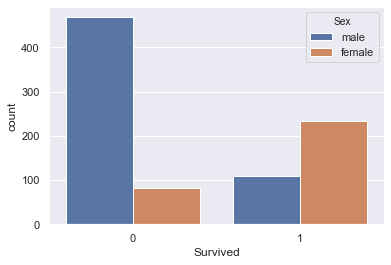

In [14]:
sns.countplot('Survived', hue='Sex', data= train)

Number of female are survived more than male

# Survival based on class

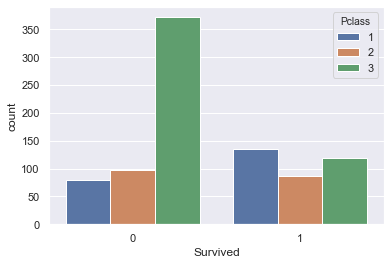

In [15]:
sns.countplot('Survived', hue='Pclass', data= train)

1 st class passengers are survived more than other class.
Number of not survied is more in 3rd class.

# Survived based on Embarked

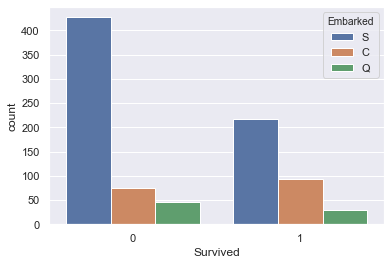

In [16]:
sns.countplot('Survived', hue='Embarked', data= train)

Passengers from c are more  survived than other two.

# Survived based on Sibsp

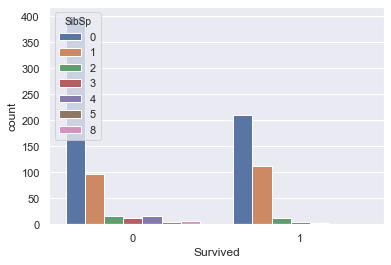

In [17]:
sns.countplot('Survived', hue='SibSp', data= train)

Passengers with more than 2 siblings or spouse more likely survived and singles are more likely dead.

# Survived based on Parch

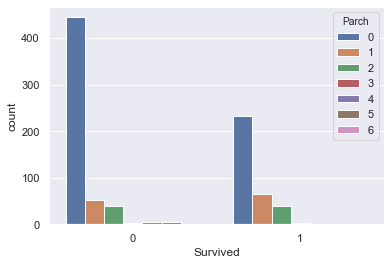

In [18]:
sns.countplot('Survived', hue='Parch', data= train)

# Handling Missing Values

# Age

In [19]:
for dataset in all_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [20]:
train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Mme           1
Don           1
Countess      1
Name: Title, dtype: int64

In [21]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [22]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 0, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 2, "Lady": 2, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 0 }

for dataset in all_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)


In [23]:
dataset.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [24]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)
test["Age"].fillna(test.groupby('Title')['Age'].transform("median"), inplace= True)

In [25]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


# Embarked

In [26]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2


In [27]:
test[test['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [28]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S has more counts. So we prefer to replace nan with S

In [29]:
train['Embarked'].fillna('S',inplace=True)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [31]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [32]:
sex_mapping = {"male": 0, "female": 1}
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [33]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,2


In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,2


# Correlation Plot

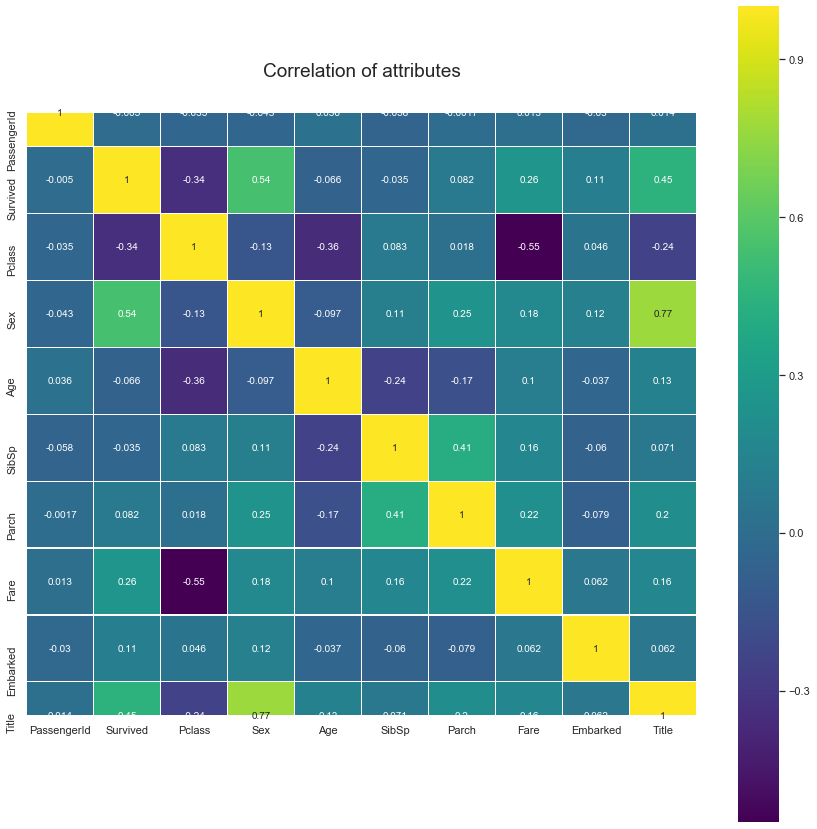

In [35]:
# For train set

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Correlation of attributes', y=1.05, size=19)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

From above matrix we observed that survived are positively correlated with Sex and titel.
Also negatively correlated with Pclass

In [36]:
corrlation_matrix =train.corr(method='pearson')
corrlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036408,-0.057527,-0.001652,0.012658,-0.030467,0.013562
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.066189,-0.035322,0.081629,0.257307,0.106811,0.446759
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.356511,0.083081,0.018443,-0.549500,0.045702,-0.243509
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.096724,0.114631,0.245489,0.182333,0.116569,0.768236
Age,0.036408,-0.066189,-0.356511,-0.096724,1.000000,-0.242961,-0.172650,0.104172,-0.036980,0.127781
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.242961,1.000000,0.414838,0.159651,-0.059961,0.071395
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172650,0.414838,1.000000,0.216225,-0.078665,0.201254
Fare,0.012658,0.257307,-0.549500,0.182333,0.104172,0.159651,0.216225,1.000000,0.062142,0.158692
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.036980,-0.059961,-0.078665,0.062142,1.000000,0.062473
Title,0.013562,0.446759,-0.243509,0.768236,0.127781,0.071395,0.201254,0.158692,0.062473,1.000000


In [37]:
# delete unnecessary feature from dataset
features_drop = ['Ticket','Cabin','Name']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)

In [38]:
train.shape

(891, 10)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [40]:
# Convert Age and fare float to int

In [41]:
pd.options.display.float_format = '{:,.0f}'.format

In [42]:
cols = ['Age', 'Fare']
train[cols] = train[cols].applymap(np.int64)

In [43]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22,1,0,7,0,0
1,2,1,1,1,38,1,0,71,1,2
2,3,1,3,1,26,0,0,7,0,1
3,4,1,1,1,35,1,0,53,0,2
4,5,0,3,0,35,0,0,8,0,0
5,6,0,3,0,28,0,0,8,2,0
6,7,0,1,0,54,0,0,51,0,0
7,8,0,3,0,2,3,1,21,0,0
8,9,1,3,1,27,0,2,11,0,2
9,10,1,2,1,14,1,0,30,1,2


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int64
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: int64(10)
memory usage: 69.7 KB


In [45]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,1044,3,0,60,0,0,nan,0,0


In [46]:
# Passenger is from 3rd class So replace nan with less value

In [47]:
test['Fare'].fillna('7',inplace=True) 

In [48]:
test[cols] = test[cols].applymap(np.int64)

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
Title          418 non-null int64
dtypes: int64(9)
memory usage: 29.5 KB


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis = 1), 
                                                    train['Survived'], test_size = 0.2, 
                                                    random_state = 10)

In [52]:
X_train.shape, y_train.shape

((712, 9), (712,))

In [53]:
X_test.shape

(179, 9)

# Modelling

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)

C:\Users\SUPRIYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
lr.score(X_train,y_train)

0.7991573033707865

In [56]:
lr.score(X_test,y_test)

0.8268156424581006

In [57]:
print(prediction)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1]


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, prediction))

[[102  15]
 [ 16  46]]


# DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
prediction=dt_model.predict(X_test)

In [61]:
dt_model.score(X_train,y_train)

0.8061797752808989

In [62]:
dt_model.score(X_test,y_test)

0.8268156424581006

In [63]:
print(prediction)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0]


# Naïve Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

navie_model= GaussianNB()
navie_model.fit(X_train,y_train)
prediction= navie_model.predict(X_test)
navie_model.score(X_train,y_train)

0.7794943820224719

In [65]:
navie_model.score(X_test,y_test)

0.7988826815642458

# Random Forest Classifier¶

In [66]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model=RandomForestClassifier(max_depth=2,random_state=0)
randomforest_model.fit(X_train,y_train)

C:\Users\SUPRIYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
prediction=randomforest_model.predict(X_test)

In [68]:
randomforest_model.score(X_train,y_train)

0.7570224719101124

In [69]:
randomforest_model.score(X_test,y_test)

0.8100558659217877

# KNN- K -Nearest Neighbour

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=21,weights='uniform')
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
knn.score(X_train, y_train)

0.6530898876404494

In [71]:
knn.score(X_test, y_test)

0.7262569832402235

# SVM

In [72]:
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

In [73]:
svc.score(X_train, y_train)

0.6264044943820225

In [74]:
svc.score(X_test, y_test)

0.6871508379888268

# Output

In [75]:
dt_model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_model.fit(X_train,y_train)
test_data=test.copy()
prediction= dt_model.predict(test_data)

In [76]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('my_submission4.csv', index=False)

In [77]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
